### Bar Charts for Baseline, IDARS and CAIMAN finetuning if we use youdens thresholding

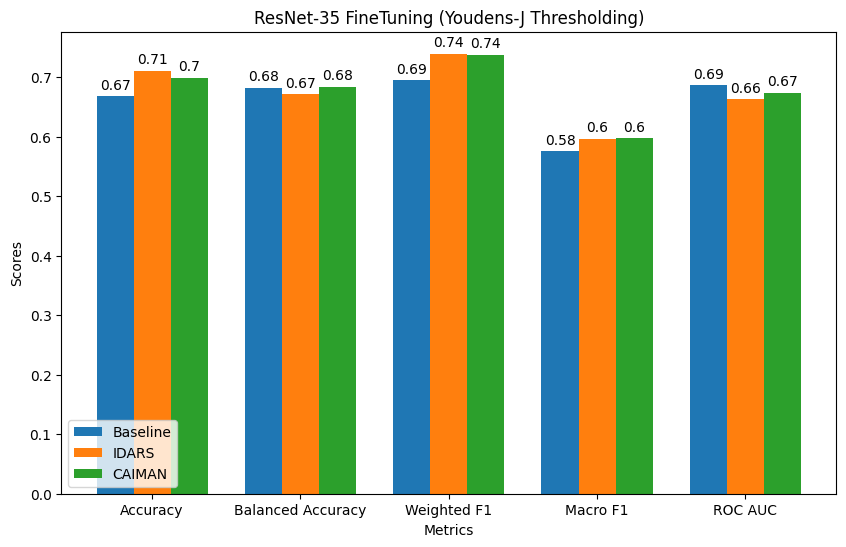

In [9]:
# Re-import necessary libraries after execution state reset
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their corresponding average metrics
models = ["Baseline", "IDARS", "CAIMAN"]
metrics = ["Accuracy", "Balanced Accuracy", "Weighted F1", "Macro F1", "ROC AUC"]

# Data from the tables
baseline = [0.6675, 0.6821, 0.6943, 0.5752, 0.6863]
idars = [0.7105, 0.6714, 0.7392, 0.5962, 0.6626]
caiman = [0.6984, 0.6839, 0.7371, 0.5975, 0.6739]

# Combine data
data = np.array([baseline, idars, caiman])

# Plot grouped bar chart
x = np.arange(len(metrics))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars
baseline_bar = ax.bar(x - width, baseline, width, label="Baseline")
idars_bar = ax.bar(x, idars, width, label="IDARS")
caiman_bar = ax.bar(x + width, caiman, width, label="CAIMAN")

# Formatting
ax.set_xlabel("Metrics")
ax.set_ylabel("Scores")
ax.set_title("ResNet-35 FineTuning (Youdens-J Thresholding)")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
# Add values on top of bars
for bars in [baseline_bar, idars_bar, caiman_bar]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset to not overlap the bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
# Show the plot
plt.show()


### If we use Max-F1 thresholding

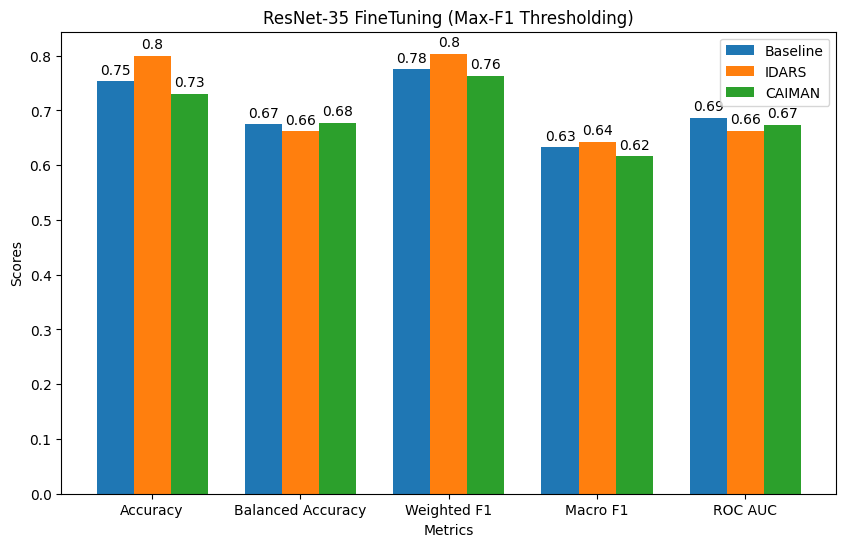

In [10]:
# Re-import necessary libraries after execution state reset
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their corresponding average metrics
models = ["Baseline", "IDARS", "CAIMAN"]
metrics = ["Accuracy", "Balanced Accuracy", "Weighted F1", "Macro F1", "ROC AUC"]

# Data from the tables
baseline = [0.753053958,	0.674668543,	0.775360493,	0.633188732,	0.68633712]
idars = [0.800292314,	0.661879932	,0.803674622	,0.643174133,	0.662574259]
caiman = [0.730959843	,0.677219919	,0.763227854	,0.616096106	,0.673916468]

# Combine data
data = np.array([baseline, idars, caiman])

# Plot grouped bar chart
x = np.arange(len(metrics))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars
baseline_bar = ax.bar(x - width, baseline, width, label="Baseline")
idars_bar = ax.bar(x, idars, width, label="IDARS")
caiman_bar = ax.bar(x + width, caiman, width, label="CAIMAN")

# Formatting
ax.set_xlabel("Metrics")
ax.set_ylabel("Scores")
ax.set_title("ResNet-35 FineTuning (Max-F1 Thresholding)")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
# Add values on top of bars
for bars in [baseline_bar, idars_bar, caiman_bar]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset to not overlap the bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
# Show the plot
plt.show()


## Deafualt setting of Radar Plot

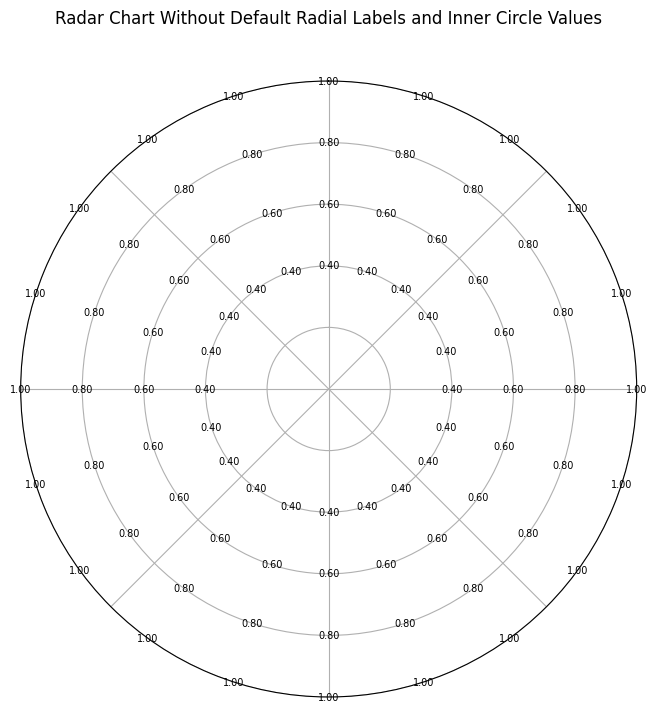

In [26]:
# Modify the radar chart to remove the default radial tick labels while keeping the custom inside values

import numpy as np
import matplotlib.pyplot as plt

# Define number of angles
N = 20
angles = np.linspace(0, 2*np.pi, N, endpoint=False)

# Create the figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Optional: set radial grid
r_ticks = np.arange(0.2, 1.01, 0.2)  # 0.2, 0.4, 0.6, 0.8, 1.0
ax.set_yticklabels([])  # Remove the default radial tick labels
ax.set_ylim(0, 1.0)

# Plot dummy lines (so we can see the grid)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Remove only the outside angle labels (theta tick labels) but keep inside values
ax.set_xticklabels([])  # Remove outer angle labels

# Add numerical values inside the radar chart, but exclude the innermost circle (r = 0.2)
for theta in angles:
    for r in r_ticks:
        if r > 0.2:  # Skip the innermost circle
            ax.text(theta, r, f"{r:.2f}",
                    ha='center', va='center', fontsize=7,
                    color='black')

# Show the plot
plt.title("Radar Chart Without Default Radial Labels and Inner Circle Values", y=1.08)
plt.show()


### Averaging Method Radar Plot

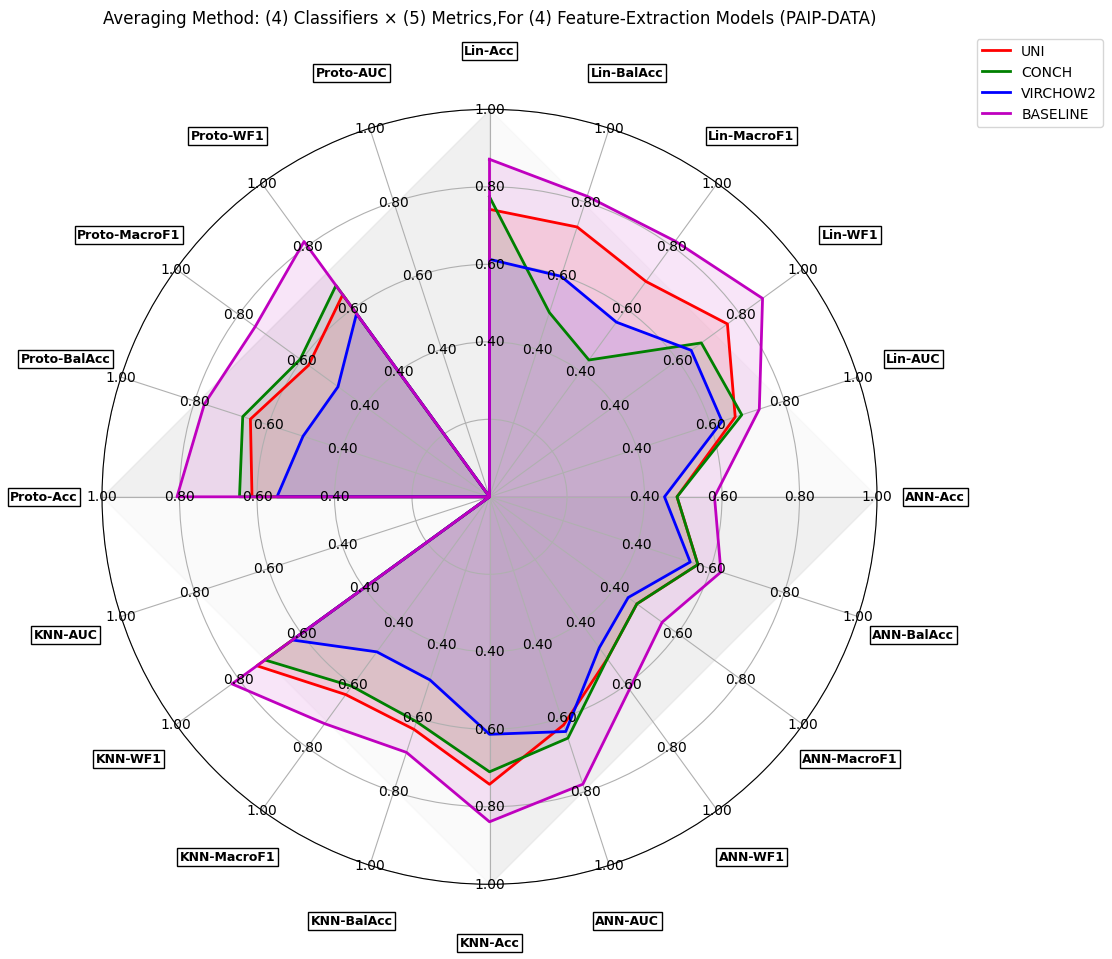

In [1]:
# Update radar plot to include axis labels around the outer circle

import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1) Define axis labels
# ----------------------------
axis_labels = [
    "Lin-Acc", "Lin-BalAcc", "Lin-MacroF1", "Lin-WF1", "Lin-AUC",
    "ANN-Acc", "ANN-BalAcc", "ANN-MacroF1", "ANN-WF1", "ANN-AUC",
    "KNN-Acc", "KNN-BalAcc", "KNN-MacroF1", "KNN-WF1", "KNN-AUC",
    "Proto-Acc", "Proto-BalAcc", "Proto-MacroF1", "Proto-WF1", "Proto-AUC"
]

N = len(axis_labels)  # 20

# ----------------------------
# 2) Gather data (fill missing AUC with 0.0)
models_data = {
    "UNI": [
      0.7419, 0.7321, 0.6869, 0.7589, 0.6667,
      0.4839, 0.5655, 0.4701, 0.5170, 0.6190,
      0.7419, 0.6310, 0.6310, 0.7419, 0.0,
      0.6129, 0.6488, 0.5773, 0.6446, 0.0
    ],
    "CONCH": [
      0.7742, 0.5000, 0.4364, 0.6757, 0.6845,
      0.4839, 0.5655, 0.4701, 0.5170, 0.6548,
      0.7097, 0.6101, 0.6043, 0.7163, 0.0,
      0.6452, 0.6696, 0.6039, 0.6740, 0.0
    ],
    "VIRCHOW2": [
      0.6129, 0.5982, 0.5571, 0.6433, 0.6310,
      0.4516, 0.5446, 0.4423, 0.4818, 0.6369,
      0.6129, 0.4970, 0.4946, 0.6287, 0.0,
      0.5484, 0.5060, 0.4833, 0.5839, 0.0
    ],
    "BASELINE": [
      0.8710, 0.8155, 0.8155, 0.8710, 0.7321,
      0.5806, 0.6280, 0.5507, 0.6143, 0.7798,
      0.8387, 0.6935, 0.7237, 0.8215, 0.0,
      0.8065, 0.7738, 0.7473, 0.8143, 0.0
    ]
}

# ----------------------------
# 3) Radar chart setup
# ----------------------------
def close_circle(data_list):
    """Helper to 'close' the radar polygon."""
    return data_list + [data_list[0]]

# Define angles for radar chart
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Close the radar

# Create figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)


# Highlight quadrants
quadrant_colors = ["#f0f0f0", "#d0d0d0", "#f0f0f0", "#d0d0d0"]  # Alternating colors
for i in range(4):
    ax.fill_between(
        [angles[i * 5], angles[(i + 1) * 5]],
        0, 1,
        color=quadrant_colors[i],
        alpha=0.3
    )

# Subplot adjustments to avoid label clipping
plt.subplots_adjust(top=0.85, bottom=0.05)

# ----------------------------
# 4) Plot each model
# ----------------------------
colors = ["r", "g", "b", "m"]  # Choose 4 distinct colors

for (model_name, values), color in zip(models_data.items(), colors):
    stats = close_circle(values)
    # make a square outside each label name to make it more visible and readable
    ax.plot(angles, stats, color=color, label=model_name, linewidth=2)
    ax.fill(angles, stats, color=color, alpha=0.1)

# ----------------------------
# 5) Customize the radar chart to match desired settings
# ----------------------------
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)  # Make the angles go clockwise

# Add axis labels around the circle
ax.set_xticks(angles[:-1])
ax.set_xticklabels(axis_labels, fontsize=9, fontweight='bold')
# place axis labels inside a sqaure to make them more visible and little padding to avoid overlapping and push the labels slightly outside the circle
for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
    x, y = label.get_position()
    label.set_position((x, y - 0.1))
    label.set_horizontalalignment('center')
    label.set_verticalalignment('center')
    label.set_rotation(angle * 180 / np.pi)
    label.set_fontsize(9)
    label.set_fontweight('bold')
    # add a square around the labels to make them more visible and readable
    label.set_bbox(dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.2')) 

# Remove default radial tick labels but keep the radial grid
ax.set_yticklabels([])
ax.set_ylim(0.0, 1.0)  # Set range

# Define radial grid values manually (excluding the innermost circle)
r_ticks = np.arange(0.2, 1.01, 0.2)
for theta in angles[:-1]:
    for r in r_ticks:
        if r > 0.2:  # Skip the innermost circle
            ax.text(theta, r, f"{r:.2f}",
                    ha='center', va='center', fontsize=10,
                    color='black')

# Add legend
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

# Title
plt.title("Averaging Method: (4) Classifiers × (5) Metrics,For (4) Feature-Extraction Models (PAIP-DATA)", y=1.10)

plt.show()


### Cluster#2 Method Radar Plot

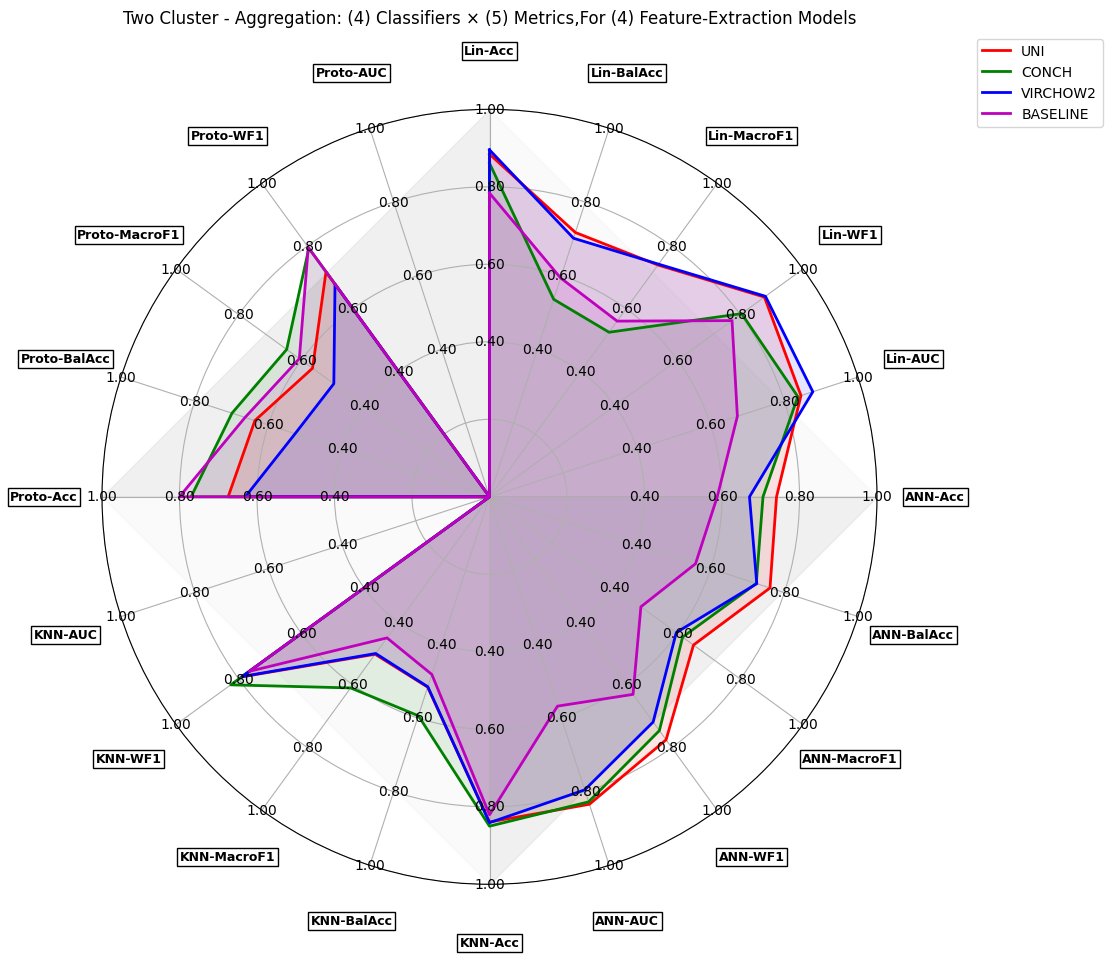

In [51]:
# Update radar plot to include axis labels around the outer circle

import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1) Define axis labels
# ----------------------------
axis_labels = [
    "Lin-Acc", "Lin-BalAcc", "Lin-MacroF1", "Lin-WF1", "Lin-AUC",
    "ANN-Acc", "ANN-BalAcc", "ANN-MacroF1", "ANN-WF1", "ANN-AUC",
    "KNN-Acc", "KNN-BalAcc", "KNN-MacroF1", "KNN-WF1", "KNN-AUC",
    "Proto-Acc", "Proto-BalAcc", "Proto-MacroF1", "Proto-WF1", "Proto-AUC"
]

N = len(axis_labels)  # 20

# ----------------------------
# 2) Gather data (fill missing AUC with 0.0)
models_data = {
    "UNI": [
        0.8842, 0.7172, 0.7394, 0.8769, 0.8451,
        0.7407, 0.7611, 0.6507, 0.7752, 0.8343,
        0.8392, 0.5164, 0.5023, 0.7908, 0.0,
        0.6745, 0.6366, 0.5645, 0.7178, 0.0
    ],
    "CONCH": [
        0.8607, 0.5359, 0.5249, 0.8042, 0.8367,
        0.7058, 0.7239, 0.6159, 0.7458, 0.8277,
        0.85, 0.5941, 0.6097, 0.8256, 0.0,
        0.7701, 0.6987, 0.647, 0.7931, 0.0
    ],
    "VIRCHOW2": [
        0.8953, 0.7016, 0.7421, 0.8803, 0.8773,
        0.6709, 0.7253, 0.5958, 0.7184, 0.7952,
        0.841, 0.5154, 0.4998, 0.789, 0.0,
        0.6302, 0.5274, 0.4966, 0.6783, 0.0
    ],
    "BASELINE": [
        0.7838, 0.5938, 0.5604, 0.7736, 0.6726,
        0.5877, 0.559, 0.4829, 0.6302, 0.568,
        0.8206, 0.4819, 0.4501, 0.7663, 0.0,
        0.8003, 0.6632, 0.6066, 0.7957, 0.0
    ]
}


# ----------------------------
# 3) Radar chart setup
# ----------------------------
def close_circle(data_list):
    """Helper to 'close' the radar polygon."""
    return data_list + [data_list[0]]

# Define angles for radar chart
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Close the radar

# Create figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)


# Highlight quadrants
quadrant_colors = ["#f0f0f0", "#d0d0d0", "#f0f0f0", "#d0d0d0"]  # Alternating colors
for i in range(4):
    ax.fill_between(
        [angles[i * 5], angles[(i + 1) * 5]],
        0, 1,
        color=quadrant_colors[i],
        alpha=0.3
    )

# Subplot adjustments to avoid label clipping
plt.subplots_adjust(top=0.85, bottom=0.05)

# ----------------------------
# 4) Plot each model
# ----------------------------
colors = ["r", "g", "b", "m"]  # Choose 4 distinct colors

for (model_name, values), color in zip(models_data.items(), colors):
    stats = close_circle(values)
    # make a square outside each label name to make it more visible and readable
    ax.plot(angles, stats, color=color, label=model_name, linewidth=2)
    ax.fill(angles, stats, color=color, alpha=0.1)

# ----------------------------
# 5) Customize the radar chart to match desired settings
# ----------------------------
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)  # Make the angles go clockwise

# Add axis labels around the circle
ax.set_xticks(angles[:-1])
ax.set_xticklabels(axis_labels, fontsize=9, fontweight='bold')
# place axis labels inside a sqaure to make them more visible and little padding to avoid overlapping and push the labels slightly outside the circle
for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
    x, y = label.get_position()
    label.set_position((x, y - 0.1))
    label.set_horizontalalignment('center')
    label.set_verticalalignment('center')
    label.set_rotation(angle * 180 / np.pi)
    label.set_fontsize(9)
    label.set_fontweight('bold')
    # add a square around the labels to make them more visible and readable
    label.set_bbox(dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.2')) 

# Remove default radial tick labels but keep the radial grid
ax.set_yticklabels([])
ax.set_ylim(0.0, 1.0)  # Set range

# Define radial grid values manually (excluding the innermost circle)
r_ticks = np.arange(0.2, 1.01, 0.2)
for theta in angles[:-1]:
    for r in r_ticks:
        if r > 0.2:  # Skip the innermost circle
            ax.text(theta, r, f"{r:.2f}",
                    ha='center', va='center', fontsize=10,
                    color='black')

# Add legend
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

# Title
plt.title("Two Cluster - Aggregation: (4) Classifiers × (5) Metrics,For (4) Feature-Extraction Models", y=1.10)

plt.show()


### Three Cluster Aggregation Radar plot

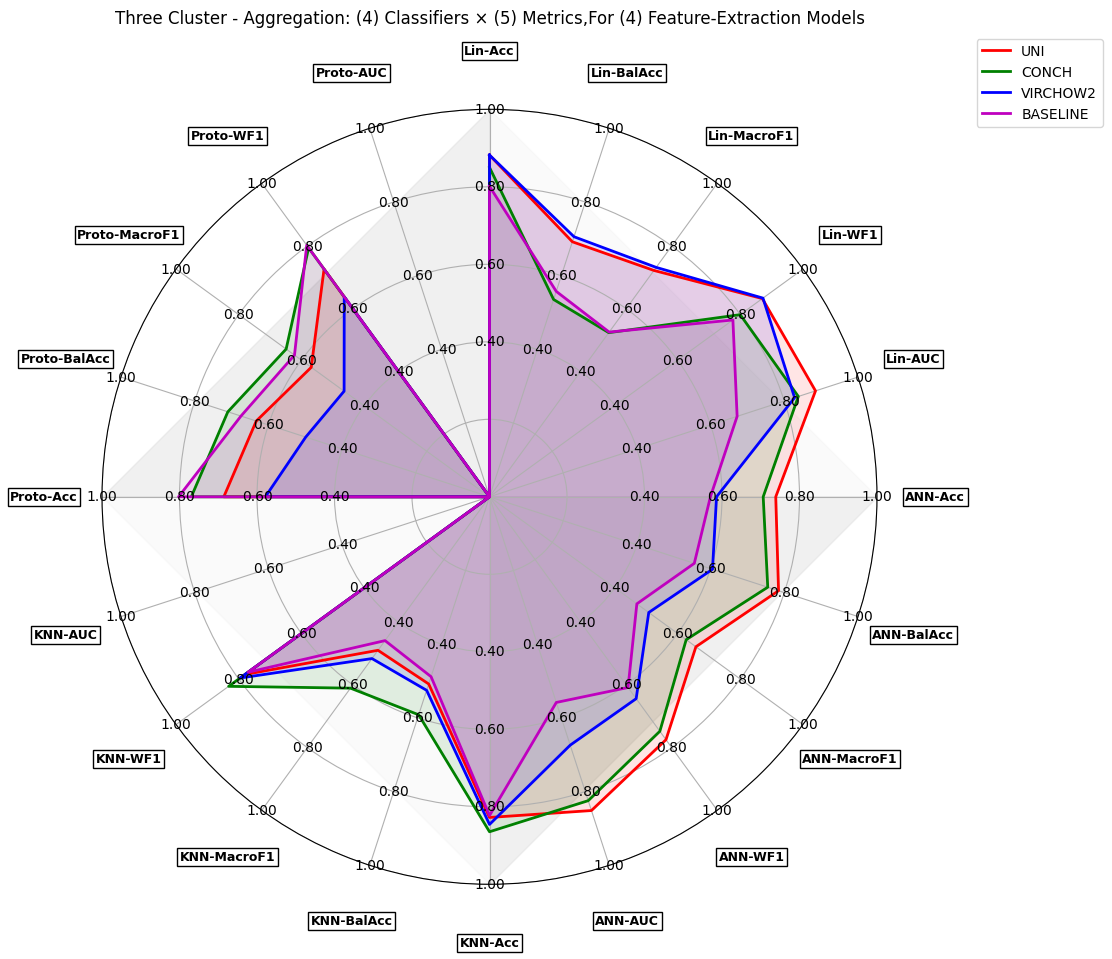

In [52]:
# Update radar plot to include axis labels around the outer circle

import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1) Define axis labels
# ----------------------------
axis_labels = [
    "Lin-Acc", "Lin-BalAcc", "Lin-MacroF1", "Lin-WF1", "Lin-AUC",
    "ANN-Acc", "ANN-BalAcc", "ANN-MacroF1", "ANN-WF1", "ANN-AUC",
    "KNN-Acc", "KNN-BalAcc", "KNN-MacroF1", "KNN-WF1", "KNN-AUC",
    "Proto-Acc", "Proto-BalAcc", "Proto-MacroF1", "Proto-WF1", "Proto-AUC"
]

N = len(axis_labels)  # 20

# ----------------------------
# 2) Gather data (fill missing AUC with 0.0)
# Create a dictionary using the Cluster 3 values from the given dataset

models_data = {
    "UNI": [
        0.8819, 0.6920, 0.7220, 0.8703, 0.8846,
        0.7387, 0.7843, 0.6584, 0.7748, 0.8513,
        0.8275, 0.5079, 0.4896, 0.7803, 0.0,
        0.6857, 0.6329, 0.5686, 0.7264, 0.0
    ],
    "CONCH": [
        0.8501, 0.5354, 0.5236, 0.7997, 0.8380,
        0.7063, 0.7550, 0.6274, 0.7479, 0.8245,
        0.8644, 0.5915, 0.6104, 0.8321, 0.0,
        0.7696, 0.7100, 0.6487, 0.7941, 0.0
    ],
    "VIRCHOW2": [
        0.8819, 0.7057, 0.7318, 0.8723, 0.8279,
        0.5859, 0.6051, 0.5080, 0.6439, 0.6739,
        0.8455, 0.5251, 0.5160, 0.7956, 0.0,
        0.5785, 0.4987, 0.4638, 0.6378, 0.0
    ],
    "BASELINE": [
        0.8012, 0.5574, 0.5254, 0.7764, 0.6719,
        0.5701, 0.5557, 0.4700, 0.6083, 0.5580,
        0.8225, 0.4881, 0.4587, 0.7700, 0.0,
        0.8024, 0.6744, 0.6221, 0.8025, 0.0
    ]
}

# ----------------------------
# 3) Radar chart setup
# ----------------------------
def close_circle(data_list):
    """Helper to 'close' the radar polygon."""
    return data_list + [data_list[0]]

# Define angles for radar chart
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Close the radar

# Create figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)


# Highlight quadrants
quadrant_colors = ["#f0f0f0", "#d0d0d0", "#f0f0f0", "#d0d0d0"]  # Alternating colors
for i in range(4):
    ax.fill_between(
        [angles[i * 5], angles[(i + 1) * 5]],
        0, 1,
        color=quadrant_colors[i],
        alpha=0.3
    )

# Subplot adjustments to avoid label clipping
plt.subplots_adjust(top=0.85, bottom=0.05)

# ----------------------------
# 4) Plot each model
# ----------------------------
colors = ["r", "g", "b", "m"]  # Choose 4 distinct colors

for (model_name, values), color in zip(models_data.items(), colors):
    stats = close_circle(values)
    # make a square outside each label name to make it more visible and readable
    ax.plot(angles, stats, color=color, label=model_name, linewidth=2)
    ax.fill(angles, stats, color=color, alpha=0.1)

# ----------------------------
# 5) Customize the radar chart to match desired settings
# ----------------------------
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)  # Make the angles go clockwise

# Add axis labels around the circle
ax.set_xticks(angles[:-1])
ax.set_xticklabels(axis_labels, fontsize=9, fontweight='bold')
# place axis labels inside a sqaure to make them more visible and little padding to avoid overlapping and push the labels slightly outside the circle
for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
    x, y = label.get_position()
    label.set_position((x, y - 0.1))
    label.set_horizontalalignment('center')
    label.set_verticalalignment('center')
    label.set_rotation(angle * 180 / np.pi)
    label.set_fontsize(9)
    label.set_fontweight('bold')
    # add a square around the labels to make them more visible and readable
    label.set_bbox(dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.2')) 

# Remove default radial tick labels but keep the radial grid
ax.set_yticklabels([])
ax.set_ylim(0.0, 1.0)  # Set range

# Define radial grid values manually (excluding the innermost circle)
r_ticks = np.arange(0.2, 1.01, 0.2)
for theta in angles[:-1]:
    for r in r_ticks:
        if r > 0.2:  # Skip the innermost circle
            ax.text(theta, r, f"{r:.2f}",
                    ha='center', va='center', fontsize=10,
                    color='black')

# Add legend
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

# Title
plt.title("Three Cluster - Aggregation: (4) Classifiers × (5) Metrics,For (4) Feature-Extraction Models", y=1.10)

plt.show()


### Nine Cluster Aggregation Radar Plot

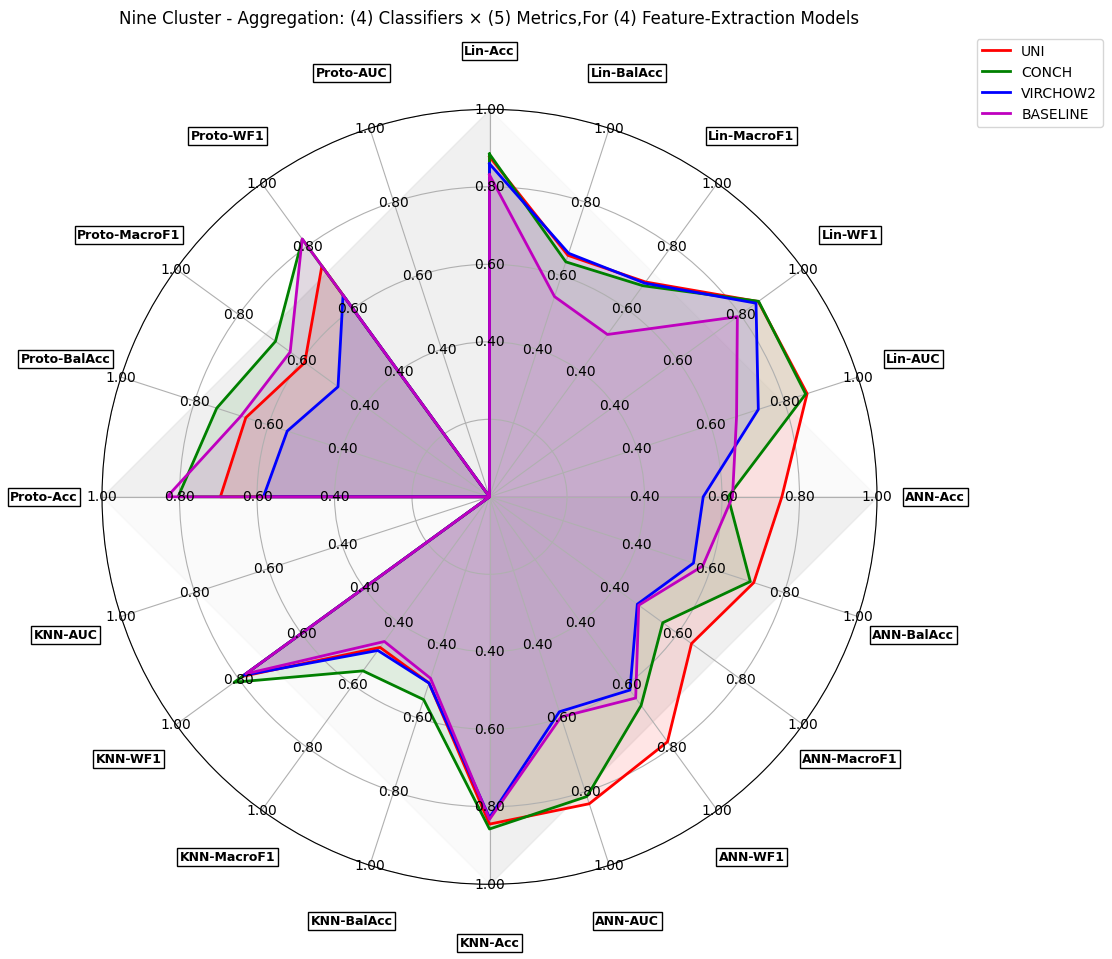

In [54]:
# Update radar plot to include axis labels around the outer circle

import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1) Define axis labels
# ----------------------------
axis_labels = [
    "Lin-Acc", "Lin-BalAcc", "Lin-MacroF1", "Lin-WF1", "Lin-AUC",
    "ANN-Acc", "ANN-BalAcc", "ANN-MacroF1", "ANN-WF1", "ANN-AUC",
    "KNN-Acc", "KNN-BalAcc", "KNN-MacroF1", "KNN-WF1", "KNN-AUC",
    "Proto-Acc", "Proto-BalAcc", "Proto-MacroF1", "Proto-WF1", "Proto-AUC"
]

N = len(axis_labels)  # 20

# ----------------------------
# 2) Gather data (fill missing AUC with 0.0)
# Create a dictionary using the Cluster 3 values from the given dataset

# Create a dictionary using the "9 clusters" values from the dataset

models_data = {
    "UNI": [
        0.8777, 0.6551, 0.6852, 0.8573, 0.8618,
        0.7545, 0.7170, 0.6444, 0.7815, 0.8329,
        0.8447, 0.5053, 0.4804, 0.7887, 0.0,
        0.6945, 0.6612, 0.5893, 0.7360, 0.0
    ],
    "CONCH": [
        0.8846, 0.6375, 0.6733, 0.8584, 0.8579,
        0.6156, 0.7076, 0.5527, 0.6656, 0.8132,
        0.8573, 0.5502, 0.5553, 0.8143, 0.0,
        0.8037, 0.7402, 0.6827, 0.8218, 0.0
    ],
    "VIRCHOW2": [
        0.8593, 0.6608, 0.6815, 0.8501, 0.7294,
        0.5515, 0.5535, 0.4715, 0.6165, 0.5833,
        0.8279, 0.5054, 0.4902, 0.7832, 0.0,
        0.5835, 0.5489, 0.4832, 0.6431, 0.0
    ],
    "BASELINE": [
        0.8307, 0.5432, 0.5178, 0.7906, 0.6704,
        0.6271, 0.5784, 0.4760, 0.6418, 0.5974,
        0.8324, 0.4925, 0.4616, 0.7771, 0.0,
        0.8321, 0.6745, 0.6358, 0.8226, 0.0
    ]
}

# ----------------------------
# 3) Radar chart setup
# ----------------------------
def close_circle(data_list):
    """Helper to 'close' the radar polygon."""
    return data_list + [data_list[0]]

# Define angles for radar chart
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Close the radar

# Create figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)


# Highlight quadrants
quadrant_colors = ["#f0f0f0", "#d0d0d0", "#f0f0f0", "#d0d0d0"]  # Alternating colors
for i in range(4):
    ax.fill_between(
        [angles[i * 5], angles[(i + 1) * 5]],
        0, 1,
        color=quadrant_colors[i],
        alpha=0.3
    )

# Subplot adjustments to avoid label clipping
plt.subplots_adjust(top=0.85, bottom=0.05)

# ----------------------------
# 4) Plot each model
# ----------------------------
colors = ["r", "g", "b", "m"]  # Choose 4 distinct colors

for (model_name, values), color in zip(models_data.items(), colors):
    stats = close_circle(values)
    # make a square outside each label name to make it more visible and readable
    ax.plot(angles, stats, color=color, label=model_name, linewidth=2)
    ax.fill(angles, stats, color=color, alpha=0.1)

# ----------------------------
# 5) Customize the radar chart to match desired settings
# ----------------------------
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)  # Make the angles go clockwise

# Add axis labels around the circle
ax.set_xticks(angles[:-1])
ax.set_xticklabels(axis_labels, fontsize=9, fontweight='bold')
# place axis labels inside a sqaure to make them more visible and little padding to avoid overlapping and push the labels slightly outside the circle
for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
    x, y = label.get_position()
    label.set_position((x, y - 0.1))
    label.set_horizontalalignment('center')
    label.set_verticalalignment('center')
    label.set_rotation(angle * 180 / np.pi)
    label.set_fontsize(9)
    label.set_fontweight('bold')
    # add a square around the labels to make them more visible and readable
    label.set_bbox(dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.2')) 

# Remove default radial tick labels but keep the radial grid
ax.set_yticklabels([])
ax.set_ylim(0.0, 1.0)  # Set range

# Define radial grid values manually (excluding the innermost circle)
r_ticks = np.arange(0.2, 1.01, 0.2)
for theta in angles[:-1]:
    for r in r_ticks:
        if r > 0.2:  # Skip the innermost circle
            ax.text(theta, r, f"{r:.2f}",
                    ha='center', va='center', fontsize=10,
                    color='black')

# Add legend
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

# Title
plt.title("Nine Cluster - Aggregation: (4) Classifiers × (5) Metrics,For (4) Feature-Extraction Models", y=1.10)

plt.show()
